# Esempio netcdf

Provo ad aprire un file netcdf, lo visualizzo e lo taglio sull'area di studio e lo salvo.

In [1]:
# importo le librerie
import xarray as xr


Definisco il percorso dove si trova il file netcdf

In [3]:
# origin path
path= '/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio'



limiti in cui faccio il ritaglio del file


In [4]:
xmin = -5
xmax = 50
ymin = 72
ymax = 85


In [6]:
path+'/L3m_20220606__GLOB_4_GSM-MODVIR_CHL1_DAY_00.nc'

'/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/L3m_20220606__GLOB_4_GSM-MODVIR_CHL1_DAY_00.nc'

Leggo il file combinando il percorso e il nome del file

In [9]:
ds = xr.open_dataset(path+'/20220606_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D.nc')

# visualizzo i metadati
ds

<xarray.Dataset>
Dimensions:              (time: 1, lat: 4320, lon: 8640)
Coordinates:
  * time                 (time) datetime64[ns] 2022-06-06
  * lat                  (lat) float32 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon                  (lon) float32 -180.0 -179.9 -179.9 ... 179.9 180.0
Data variables: (12/21)
    CHL                  (time, lat, lon) float32 ...
    CHL_uncertainty      (time, lat, lon) float32 ...
    flags                (time, lat, lon) int8 ...
    DIATO                (time, lat, lon) float32 ...
    DINO                 (time, lat, lon) float32 ...
    HAPTO                (time, lat, lon) float32 ...
    ...                   ...
    GREEN_uncertainty    (time, lat, lon) float32 ...
    PROKAR_uncertainty   (time, lat, lon) float32 ...
    PROCHLO_uncertainty  (time, lat, lon) float32 ...
    MICRO_uncertainty    (time, lat, lon) float32 ...
    NANO_uncertainty     (time, lat, lon) float32 ...
    PICO_uncertainty     (time, lat, lon) float32 ...
Attributes: (12/91)
    lon_step:                        0.041666668
    keywords:                        EARTH SCIENCE > OCEANS > OCEAN CHEMISTRY...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    lat_step:                        0.041666668
    grid_mapping:                    Equirectangular
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    ...                              ...
    contact:                         servicedesk.cmems@acri-st.fr
    westernmost_longitude:           -180.0
    geospatial_vertical_positive:    up
    date_created:                    2022-11-25T11:29:47Z
    nb_valid_bins:                   10915839
    pct_valid_bins:                  29.245539158950617

Plotto la mappa della clorofilla

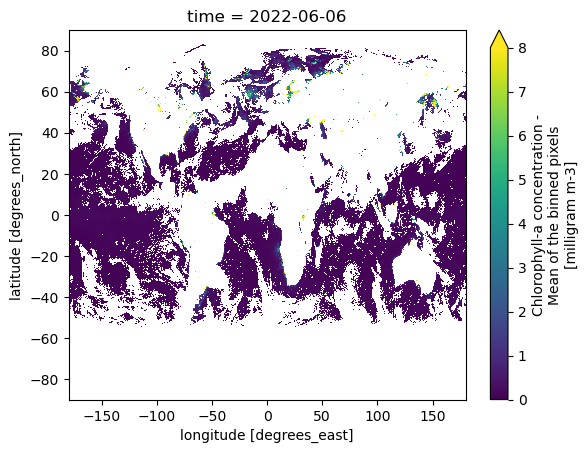

In [14]:
ds.CHL.plot(vmin=0, vmax=8, cmap='viridis')

Ritaglio il file sulla mia area di studio

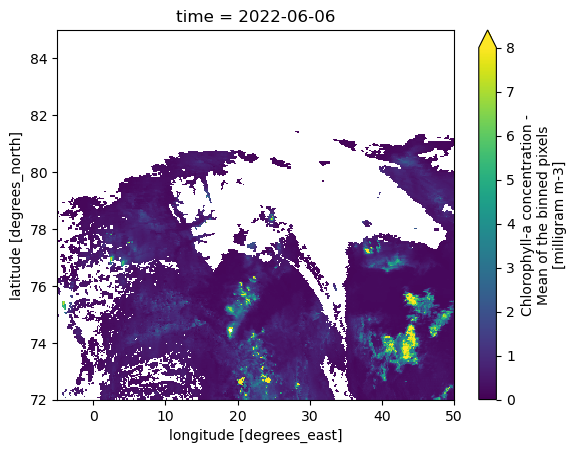

In [15]:
ds_crop = ds.sel(lat=slice(ymax, ymin), lon=slice(xmin, xmax))

ds_crop.CHL.plot(vmin=0, vmax=8, cmap='viridis')

salvo il file

In [16]:
ds_crop.to_netcdf(path+'/20220606_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc')


Potrei leggere i file in maniera sistematica lavorando sul nome dei file

In [23]:
year = 2022
month = 6

for day in range(1, 31):
    print(path + '/' + '{}{:02d}{:02d}_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc'.format(year, month, day))

/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/20220601_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc
/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/20220602_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc
/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/20220603_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc
/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/20220604_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc
/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/20220605_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc
/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/20220606_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc
/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/20220607_cmems_obs-oc_glo_bgc-plankton_myint_l3-multi-4km_P1D_crop.nc
/mnt/d/Dropbox/R_projects/SV_phenology/data/globcolour/esempio/202206